In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets('./MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.test.images.shape

(10000, 784)

In [5]:
mnist.validation.images.shape

(5000, 784)

In [6]:
train_x,train_y=mnist.train.next_batch(20000)

In [7]:
train_x.shape

(20000, 784)

In [8]:
test_x,test_y=mnist.test.next_batch(5000)

### 图像的可视化

In [9]:
import matplotlib.pyplot as plt

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


<function matplotlib.pyplot.show(*args, **kw)>

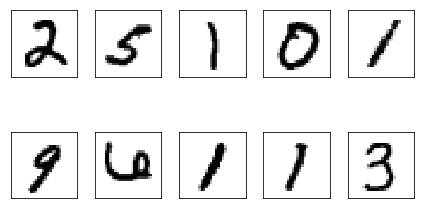

In [10]:
plt.rc('image',cmap='binary')
for i in range(10):#打印10张图
    plt.subplot(2,5,i+1)
    plt.imshow(train_x[i].reshape(28,28))
    print(train_y[i])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show

### 全连接神经网络

In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
def model1():
    model=Sequential()
    model.add(Dense(784,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [13]:
m=model1()

In [14]:
m.compile(optimizer='adam',loss='categorical_crossentropy')

In [55]:
history=m.fit(train_x,train_y,epochs=30,batch_size=32)

Epoch 1/30
20000/20000 [==============================] - 8s 382us/step - loss: 0.0117
Epoch 2/30
20000/20000 [==============================] - 8s 384us/step - loss: 0.0063
Epoch 3/30
20000/20000 [==============================] - 8s 383us/step - loss: 0.0127
Epoch 4/30
20000/20000 [==============================] - 8s 384us/step - loss: 0.0082 0s -
Epoch 5/30
20000/20000 [==============================] - 8s 383us/step - loss: 0.0116
Epoch 6/30
20000/20000 [==============================] - 8s 381us/step - loss: 0.0047
Epoch 7/30
20000/20000 [==============================] - 8s 384us/step - loss: 0.0025
Epoch 8/30
20000/20000 [==============================] - 8s 386us/step - loss: 0.0036 0s - loss: 0
Epoch 9/30
20000/20000 [==============================] - 8s 381us/step - loss: 0.0231
Epoch 10/30
20000/20000 [==============================] - 8s 382us/step - loss: 0.0067
Epoch 11/30
20000/20000 [==============================] - 8s 386us/step - loss: 0.0035
Epoch 12/30
20000/20000

In [16]:
pred=m.predict(test_x)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(pred.argmax(1),test_y.argmax(1))

0.975

## LeNet

In [19]:
import torch

In [20]:
import torch.nn as nn 

In [21]:
import torch.nn.functional as F

In [22]:
import torch.optim as optim

In [23]:
import torchvision

In [24]:
import torchvision.transforms as transforms

In [25]:
import torchvision.datasets as datasets

In [26]:
import os 
import random
import numpy as np 

In [27]:
data_trans=transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor()
#    transforms.Normalize(()())?<-参数mean和std来自于训练集，但是transform本身会在训练和评测的时候都会使用
])

### 图像的Normalize

目的：将图片进行归一化的缩放|(x-mean)/std

思考：图片归一化后，真的不存在小于0或者大于1的outlier了吗？ 不一定

思考：归一化哪部分数据？A 训练集 B 评测集 C 训练集+评测集？ A


In [28]:
np.mean(mnist.test.images)

0.13251467

In [29]:
np.std(mnist.test.images)

0.3104802

In [30]:
data_trans=transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))#参数mean和std来自于训练集，但是transform本身会在训练和评测的时候都会使用
])

In [31]:
train_data=datasets.MNIST('data',train=True,download=True,transform=data_trans)
test_data=datasets.MNIST('data',train=False,download=True,transform=data_trans)


In [32]:
n_train=int(len(train_data)*0.9)
n_validation=len(train_data)-n_train

In [33]:
train_data,valid_data=torch.utils.data.random_split(train_data,[n_train,n_validation])

In [34]:
print(len(train_data),len(valid_data),len(test_data))

54000 6000 10000


In [35]:
batch_size=64

目前完成了数据集的制作

In [36]:
train_iterator=torch.utils.data.DataLoader(train_data,shuffle=True,batch_size=batch_size)
valid_iterator=torch.utils.data.DataLoader(valid_data,batch_size=batch_size)
test_iterator=torch.utils.data.DataLoader(test_data,batch_size=batch_size)

In [37]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        #第一层conv1卷积层，in_channel=1,output_channel=6,kernel_size=5*5,input_size=32*32,output_size=28*28
        self.conv1=nn.Conv2d(1,6,5)
        #第二层conv2，output_channel=6 ,kernel 5*5,output_size=10*10,input_size=14*14
        self.conv2=nn.Conv2d(6,16,5)
        
        self.fc1=nn.Linear(16*5*5,120)
        
        self.fc2=nn.Linear(120,80)
        
        self.fc3=nn.Linear(80,10)#不用增加softmax层，在cross_entropy的Loss中自动增加了Softmax
        
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(x.shape[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

到此，神经网络定义完毕

## 载入模型并训练

In [38]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [39]:
device

device(type='cuda')

In [40]:
model=LeNet().to(device)

In [41]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

In [42]:
optimizer=optim.Adam(model.parameters())

In [43]:
criterion=nn.CrossEntropyLoss()

In [44]:
### 如何评测结果--计算精确度

In [45]:
def accu(fx,y):
    pred=fx.max(1,keepdim=True)[1]
    correct=pred.eq(y.view_as(pred)).sum()#得到该batch的准确度
    acc=correct.float()/pred.shape[0]
    return acc
    

In [46]:
def train(model,device,iterator,optimizer,criterion):
    epoch_loss=0#积累变量
    epoch_acc=0#积累变量
    model.train()#该函数表示PHASE=Train
    
    for (x,y) in iterator:#拿去每一个minibatch
        x=x.to(device)
        y=y.to(device)
        optimizer.zero_grad()
        fx=model(x)#进行forward
        loss=criterion(fx,y)#计算Loss,train_loss
        type(loss)
        acc=accu(fx,y)#计算精确度，train_accu
        loss.backward()#进行BP
        optimizer.step()#统一更新模型
        epoch_loss+=loss.item()
        epoch_acc+=acc.item()
        
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

In [47]:
def evaluate(model,device,iterator,criterion):
    epoch_loss=0
    epoch_acc=0
    model.eval()
    with torch.no_grad():
        for (x,y) in iterator:
            x=x.to(device)
            y=y.to(device)
            fx=model(x)
            loss=criterion(fx,y)
            acc=accu(fx,y)
            epoch_loss+=loss.item()
            epoch_acc+=acc.item()
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

## 开始训练

In [48]:
epochs=10
model_dir='models'
model_path=os.path.join(model_dir,'lenet_mnist.pt')

In [49]:
best_valid_loss=float('inf')

In [50]:
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

In [51]:
#criterion

In [54]:
for epoch in range(epochs):
    train_loss,train_acc=train(model,device,train_iterator,optimizer,criterion)
    valid_loss,valid_acc=evaluate(model,device,valid_iterator,criterion)
    if valid_loss<best_valid_loss:#如果是最好的模型就保存到文件夹
        best_valid_loss=valid_loss
        torch.save(model.state_dict(),model_path)
    print('Epoch:{0}|Train Loss:{1}|Train Acc:{2}|Val Loss:{3}|Val Acc:{4}'.format(epoch+1,train_loss,train_acc,valid_loss,valid_acc))

Epoch:1|Train Loss:0.015132778076252512|Train Acc:0.9951680983412322|Val Loss:0.03702611379087605|Val Acc:0.9915226063829787
Epoch:2|Train Loss:0.01339238127130768|Train Acc:0.9957234893364929|Val Loss:0.04205961907381549|Val Acc:0.9878656914893617
Epoch:3|Train Loss:0.012011877664969571|Train Acc:0.9958654226143778|Val Loss:0.043958318849500425|Val Acc:0.9900265957446809
Epoch:4|Train Loss:0.009996988230918824|Train Acc:0.9966861670616114|Val Loss:0.04160534016579944|Val Acc:0.9905252659574468
Epoch:5|Train Loss:0.010914714325007529|Train Acc:0.9964640106635071|Val Loss:0.050777682771985515|Val Acc:0.9872007978723404
Epoch:6|Train Loss:0.00818320645874044|Train Acc:0.9968157582938388|Val Loss:0.04803301695179432|Val Acc:0.9891954787234043
Epoch:7|Train Loss:0.007379228564782589|Train Acc:0.9977414099526066|Val Loss:0.04465263348786121|Val Acc:0.9902482273730826
Epoch:8|Train Loss:0.008862119750671476|Train Acc:0.9970749407582938|Val Loss:0.04056567014095948|Val Acc:0.9903590425531915


In [53]:
model.load_state_dict(torch.load(model_path))

test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

print('| Test Loss: {0} | Test Acc: {1} |'.format(test_loss,test_acc))

| Test Loss: 0.036391854048914214 | Test Acc: 0.9892515923566879 |
